# MOVIE RECOMMENDER ENGINE - 2
Data - Amazaon Movies and TV

## KNN - Collaborative Filtering
KNN-based Collaborative Filtering Approach to Recommendations

In [26]:
import pandas as pd
import numpy as np

In [37]:
#For Extracting data from JSON file
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/Users/siddharthmandgi/Desktop/2020-Summer-Honors-Research/Datasets/reviews_Movies_and_TV_5.json.gz')

df.to_csv('/Users/siddharthmandgi/Desktop/2020-Summer-Honors-Research/Datasets/Amazon_Movies.csv')

In [38]:
df = pd.read_csv("/Users/siddharthmandgi/Desktop/2020-Summer-Honors-Research/Datasets/Amazon_Movies.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.rename(columns = {"asin" : "Movie_ID", "overall" : "ratings" })
df['ratings'] = df['ratings'].astype(int)
ratings = df['ratings'].unique().tolist()
df

,reviewerID,Movie_ID,reviewerName,helpful,reviewText,ratings,summary,unixReviewTime,reviewTime
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,1203984000,"02 26, 2008"
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,1388361600,"12 30, 2013"
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,1387670400,"12 22, 2013"
...,...,...,...,...,...,...,...,...,...
1697528,AV657BUYHHXZ2,B00LT1JHLW,"Mike Rules ""Mike""","[1, 14]",wow $269.99 for the entire series on Blu Ray??...,1,Way to Expensive!! WB = GREED,1406073600,"07 23, 2014"
1697529,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","[32, 48]","Finally, the holy grail of tv-on-dvd boxsets i...",5,"HOLY BAT-BOXSET, BATMAN... I never thought thi...",1405641600,"07 18, 2014"
1697530,A3DE438TF1A958,B00LT1JHLW,thomas henry,"[3, 10]",Could this be a true or I'm i dreaming batman ...,5,prayers have been answered because batman 60s ...,1405728000,"07 19, 2014"
1697531,A2RWCXDMANY0LW,B00LT1JHLW,wheev,"[0, 4]",I've been a fan of the series since I was a yo...,5,can't Wait!,1405987200,"07 22, 2014"


### Dataset of *Mean Ratings* & *No of Ratings* EDA

In [39]:
mean_ratings = df.groupby(by=["Movie_ID"])['ratings'].mean()
num_reviews = pd.DataFrame(mean_ratings)
num_reviews['mean_ratings'] = num_reviews['ratings']
num_reviews = num_reviews.drop(['ratings'],axis=1)

number_of_reviews = df.groupby(by=["Movie_ID"])['ratings'].count()
num_reviews['no_of_reviews'] = number_of_reviews
num_reviews

,mean_ratings,no_of_reviews
Movie_ID,,
0005019281,4.458716,109
0005119367,4.793478,92
0307141985,4.800000,5
0307142469,4.750000,40
0307142477,2.333333,6
...,...,...
B00L8QP082,2.888889,9
B00LCAD24S,2.875000,8
B00LG7VVPO,4.833333,12


## Visualizations of no of reviews

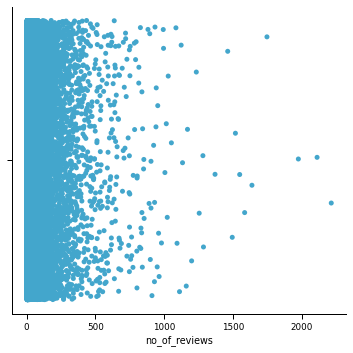

In [40]:
import seaborn as sns
sns.set_context('paper')
# create plot
ax = sns.catplot(x = 'no_of_reviews', data = num_reviews, palette = 'GnBu_d')

From this visualization we conclude that majority of no_of_reviews lies in around the range: ***0-1000***

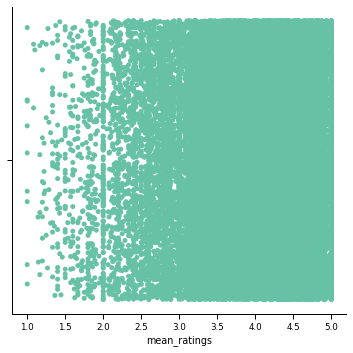

In [41]:
import seaborn as sns
sns.set_context('paper')
# create plot
ax = sns.catplot(x = 'mean_ratings', data = num_reviews, palette = 'BuGn_r')

In [42]:
num_reviews['no_of_reviews'].describe()

count    50052.000000
mean        33.915388
std         73.466260
min          5.000000
25%          7.000000
50%         13.000000
75%         29.000000
max       2213.000000
Name: no_of_reviews, dtype: float64

In [44]:
num_reviews[num_reviews['no_of_reviews']==2213]

,mean_ratings,no_of_reviews
Movie_ID,,
B003EYVXV4,4.115228,2213


 Movie ID B003EYVXV4 has the **max total no of reviews = 2213** and a **mean rating = 4.11528** making it the most popular movie. **Average number of reviews per movie = 33.905**

### Including the no_of_reviews and mean_ratings in the original dataset

In [9]:
df['no_of_reviews'] = df.groupby('Movie_ID')['Movie_ID'].transform('count')
df['mean_ratings'] = df.groupby('Movie_ID')['ratings'].transform('mean')
df

,reviewerID,Movie_ID,reviewerName,helpful,reviewText,ratings,summary,unixReviewTime,reviewTime,no_of_reviews,mean_ratings
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,1203984000,"02 26, 2008",109,4.458716
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,1388361600,"12 30, 2013",109,4.458716
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,1388361600,"12 30, 2013",109,4.458716
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008",109,4.458716
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,1387670400,"12 22, 2013",109,4.458716
...,...,...,...,...,...,...,...,...,...,...,...
866649,A1GWN5P68BQOE6,B0006FO9C4,Monica,"[0, 0]",Alice was a gift to a great Alice fan. It arri...,5,alice was a gift,1376092800,"08 10, 2013",20,3.400000
866650,A3QNY1YCCEALHP,B0006FO9C4,rkass,"[1, 1]","Well worth watching, at least once, for Carrol...",4,Very interesting!,1279497600,"07 19, 2010",20,3.400000
866651,A1KT1BXUTM1E8,B0006FO9C4,"sexy dancer ""mandy""","[0, 0]",This is one version that is very impressive. ...,5,Beautiful cinematography.,1363219200,"03 14, 2013",20,3.400000
866652,A1XV95ID4PBQSH,B0006FO9C4,Sherrill M. Meeks,"[0, 0]",I purchased this as a gift for my daughter who...,5,I don't know,1380067200,"09 25, 2013",20,3.400000


 ### Popularity Threshold
 Movies having number of reviews less than the threshold value are filtered out

In [11]:
popularity_threshold = 30
rating_popular_movies = df.query('no_of_reviews >= @popularity_threshold')
rating_popular_movies

,reviewerID,Movie_ID,reviewerName,helpful,reviewText,ratings,summary,unixReviewTime,reviewTime,no_of_reviews,mean_ratings
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,1203984000,"02 26, 2008",109,4.458716
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,1388361600,"12 30, 2013",109,4.458716
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,1388361600,"12 30, 2013",109,4.458716
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008",109,4.458716
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,1387670400,"12 22, 2013",109,4.458716
...,...,...,...,...,...,...,...,...,...,...,...
866629,A2MMICEG6CEOPF,B0006FO9B0,William Reger,"[0, 1]",This movie wraps up the four seasons of the re...,4,Nice Wrap to a Shortened Series!,1381795200,"10 15, 2013",176,4.636364
866630,A2ZHSORK1HHYTT,B0006FO9B0,Willy D. Reviewer,"[0, 0]",When this magnificent television series abrupt...,5,Farscape Lovers Must Buy This Film,1340236800,"06 21, 2012",176,4.636364
866631,A3NPF04WPAPL9U,B0006FO9B0,yank1776,"[0, 0]","Love it, plan on watching it every year and s...",5,Fantastic,1401753600,"06 3, 2014",176,4.636364
866632,A2UYKOY3GAGEWS,B0006FO9B0,"Y. morgan ""BEADIN ON""","[1, 1]",FARSACAPE IS MASSIVELY INTENSE!!! loved the s...,5,farscape ferver!!!,1271635200,"04 19, 2010",176,4.636364


 ### Pivot Table for Movie_ID, reviewerID & ratings

In [12]:
movie_features_df = rating_popular_movies.pivot_table(index='Movie_ID', columns ='reviewerID', values='ratings').fillna(0)
movie_features_df

reviewerID,A00295401U6S2UG3RAQSZ,A00348066Q1WEW5BMESN,A0040548BPHKXMHH3NTI,A00438023NNXSDBGXK56L,A0048168OBFNFN7WW8XC,A00503563AVX48TRHJGR6,A0056274FAHZQC4N2ZN8,A0057670FKKO20E9X6XL,A00700212KB3K0MVESPIY,A00800615OVHYSOGUA70,...,AZZJBM73CGLNG,AZZL199Q879FU,AZZL3XXUJVJ68,AZZNTTHU6NNRB,AZZQLMNX239VT,AZZWPNME0GQZ2,AZZYW4YOE1B6E,AZZZ159U3Q5OO,AZZZA9JS7UPHO,AZZZMSZI9LKE6
Movie_ID,,,,,,,,,,,,,,,,,,,,,
0005019281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005119367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0307142469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0307142485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0307142493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0006FO8E8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0006FO8HA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0006FO8IY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Head and Tail of the Pivot table to show that every movie has been rated by atleast one or many users.

In [13]:
movie_features_df.tail(5).replace(0, np.nan).bfill(1).iloc[:, 0]

Movie_ID
B0006FO8E8    2.0
B0006FO8HA    4.0
B0006FO8IY    5.0
B0006FO8NY    4.0
B0006FO9B0    5.0
Name: A00295401U6S2UG3RAQSZ, dtype: float64

In [14]:
movie_features_df.head(5).replace(0, np.nan).bfill(1).iloc[:, 0]

Movie_ID
0005019281    5.0
0005119367    5.0
0307142469    5.0
0307142485    5.0
0307142493    5.0
Name: A00295401U6S2UG3RAQSZ, dtype: float64

### Sparse Matrix & KNN

In [15]:
from scipy.sparse import csr_matrix as csr
movies_csr = csr(movie_features_df.values)
from sklearn.neighbors import NearestNeighbors as NN
model = NN(metric = 'cosine', algorithm = 'brute')

model.fit(movies_csr)

NearestNeighbors(algorithm='brute', metric='cosine')

In [16]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)

895


In [17]:
movie_features_df.shape

(6852, 104901)

In [22]:
distances, indices = model.kneighbors(movie_features_df, n_neighbors = 10)

### Top 5 Recommendations & their Resective Distances

In [25]:
for i in range(0,6):
        if i ==0:
            print('Recommendations for Movie_ID: {0}\n'.format(movie_features_df.index[query_index]))
        else:
            print('{0} : {1} with a cosine distance of {2}'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))  

Recommendations for Movie_ID: 0790744473

1 : 0780623746 with a cosine distance of 0.8951558003262833
2 : 6302993687 with a cosine distance of 0.9205581911370118
3 : 6303824358 with a cosine distance of 0.9345337468831068
4 : 6300251004 with a cosine distance of 0.9531553810066405
5 : 6305513406 with a cosine distance of 0.9585269837602576


- The best case scenario: Cos0 = 1 which implies maximum similarity 
- The worst case scenario: Cos90 = 0 which implies maximum disimilarity 

***Our distance values are arround 0.95 which implies that our recommendations are very similar in features to our reviewed movie.*** 

 ## Weighted Average based Recommendations
 Considering weighted average of ratings to generate recommendations

<img src="algorithm.png" align="left" width="500" height="100"> 

- W = weighted score
- R = Average Rating
- C = the mean of all votes across the dataset
- v = no of votes or reviews for the movie
- m = minimum votes or number of reviews required to be in the top 250

***This algorithm is used by IMDB***

In [5]:
num_reviews

,mean_ratings,no_of_reviews
Movie_ID,,
0005019281,4.458716,109
0005119367,4.793478,92
0307141985,4.800000,5
0307142469,4.750000,40
0307142477,2.333333,6
...,...,...
B00L8QP082,2.888889,9
B00LCAD24S,2.875000,8
B00LG7VVPO,4.833333,12


In [71]:
v = num_reviews['no_of_reviews']
v

Movie_ID
0005019281    109
0005119367     92
0307141985      5
0307142469     40
0307142477      6
             ... 
B00L8QP082      9
B00LCAD24S      8
B00LG7VVPO     12
B00LH9ROKM      9
B00LT1JHLW     11
Name: no_of_reviews, Length: 50052, dtype: int64

In [77]:
R = num_reviews['mean_ratings']
R

Movie_ID
0005019281    4.458716
0005119367    4.793478
0307141985    4.800000
0307142469    4.750000
0307142477    2.333333
                ...   
B00L8QP082    2.888889
B00LCAD24S    2.875000
B00LG7VVPO    4.833333
B00LH9ROKM    2.777778
B00LT1JHLW    4.272727
Name: mean_ratings, Length: 50052, dtype: float64

In [78]:
C = num_reviews['mean_ratings'].mean()
C

4.063543208023352

In [79]:
m = twofifty['no_of_reviews'].quantile(0.70)
m

24.0

In [80]:
W = (R*v + C*m) / (v + m)
W

Movie_ID
0005019281    4.387406
0005119367    4.642457
0307141985    4.190519
0307142469    4.492579
0307142477    3.717501
                ...   
B00L8QP082    3.743183
B00LCAD24S    3.766407
B00LG7VVPO    4.320140
B00LH9ROKM    3.712880
B00LT1JHLW    4.129287
Length: 50052, dtype: float64

In [86]:
num_reviews['weighted_average'] = W

### Generating recommendations from max to min weighted score...

In [87]:
recommendations = num_reviews.sort_values('weighted_average', ascending=False)
recommendations

,mean_ratings,no_of_reviews,weighted_average
Movie_ID,,,
B006W9KNXC,4.933835,665,4.903520
B004NSUXHU,4.890323,1085,4.872430
B0007N1BBC,4.924460,278,4.856043
B00006C7G9,4.870321,748,4.845240
B003TO541O,4.876712,511,4.840234
...,...,...,...
B00BTFK07I,1.425532,47,2.317254
0790732475,2.075000,320,2.213736
B001RIYVYK,1.619048,84,2.162269
